In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm
import astropy.units as u 
from astropy.coordinates import SkyCoord
import regions
from regions import Regions

from spectral_cube import SpectralCube
import importlib as imp

from dust_extinction.averages import CT06_MWLoc, I05_MWAvg, CT06_MWGC, G21_MWAvg, RL85_MWGC, RRP89_MWGC, F11_MWGC


In [2]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [3]:
import moment_maker as mm
from jwst_plots import JWSTCatalog, make_cat_use
import cutout_manager as cm
import jwst_plots
import co_ice as co_map
import extinction as ex


In [4]:
cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [5]:
cat_use = make_cat_use()

# Select Red Clump Stars

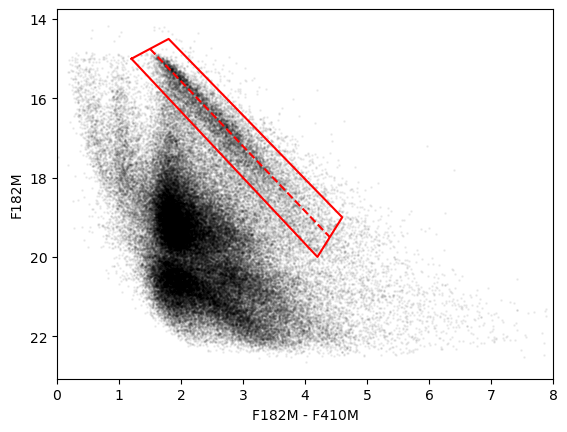

In [78]:
ax = plt.subplot(111)
cat_use.plot_CMD('f182m', 'f410m', 'f182m', s=1, color='k', alpha=0.05, ax=ax)
ax.set_xlim(0, 8)

x1, y1 = 1.2, 15.
x2, y2 = 4.2, 20
x3, y3 = 4.6, 19
x4, y4 = 1.8, 14.5
ax.plot([x1, x2, x3, x4, x1], [y1, y2, y3, y4, y1], color='r')

x5, y5 = (x1 + x4) / 2, (y1 + y4) / 2
x6, y6 = (x2 + x3) / 2, (y2 + y3) / 2
ax.plot([x5, x6], [y5, y6], color='r', linestyle='--')
#ax.scatter(x1, y1, s=100, color='r', marker='x')

In [79]:
x = cat_use.color('f182m', 'f410m')
y = cat_use.band('f182m')

(0.0, 8.0)

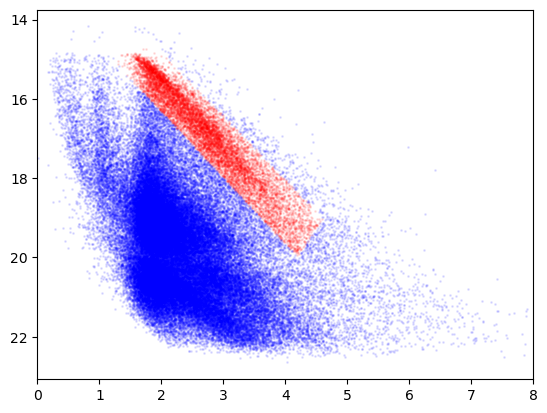

In [80]:
def get_line_eq(x0, x1, y0, y1):
    return y0 - y1, x1 - x0, x0 * y1 - x1 * y0

ar1, br1, cr1 = get_line_eq(x1, x2, y1, y2)
ar2, br2, cr2 = get_line_eq(x2, x3, y2, y3)
ar3, br3, cr3 = get_line_eq(x3, x4, y3, y4)
ar4, br4, cr4 = get_line_eq(x4, x1, y4, y1)

mask = (ar1 * x + br1 * y + cr1 < 0) & (ar2 * x + br2 * y + cr2 < 0) & (ar3 * x + br3 * y + cr3 < 0) & (ar4 * x + br4 * y + cr4 < 0)

plt.scatter(x[mask], y[mask], s=1, color='r', alpha=0.1)
plt.scatter(x[~mask], y[~mask], s=1, color='b', alpha=0.1)
plt.gca().invert_yaxis()
plt.xlim(0, 8)

# Divide Red Clump in Two

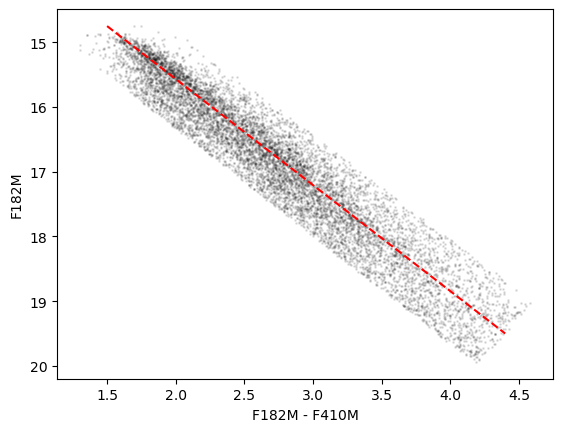

In [81]:
cat_clump = JWSTCatalog(cat_use.apply_mask(mask))

cat_clump.plot_CMD('f182m', 'f410m', 'f182m', s=1, color='k', alpha=0.1)
plt.plot([x5, x6], [y5, y6], color='r', linestyle='--')

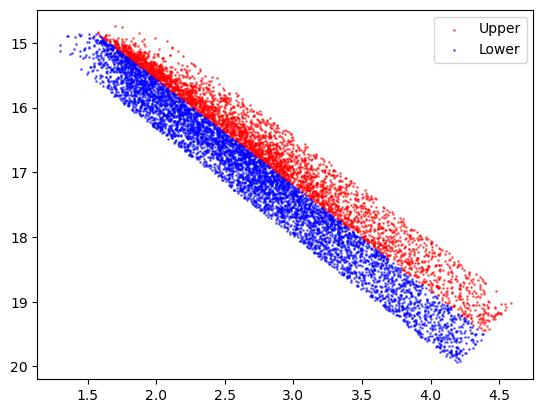

In [89]:
ar5, br5, cr5 = get_line_eq(x5, x6, y5, y6)

x_1 = cat_clump.color('f182m', 'f410m')
y_1 = cat_clump.band('f182m')

mask_upper = ar5 * x_1 + br5 * y_1 + cr5 < 0
mask_lower = ar5 * x_1 + br5 * y_1 + cr5 > 0

plt.scatter(x_1[mask_upper], y_1[mask_upper], s=1, color='r', alpha=0.5, label='Upper')
plt.scatter(x_1[mask_lower], y_1[mask_lower], s=1, color='b', alpha=0.5, label='Lower')
plt.gca().invert_yaxis()
plt.legend()

In [83]:
cat_clump_upper = JWSTCatalog(cat_clump.apply_mask(mask_upper))
cat_clump_lower = JWSTCatalog(cat_clump.apply_mask(mask_lower))

# Plot Upper and Lower RC

In [84]:
fn = '/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
hdu_405 = fits.open(fn)
data_405 = hdu_405[1].data
blank_405 = np.zeros_like(data_405)*np.nan
wcs_405 = WCS(hdu_405[1].header)

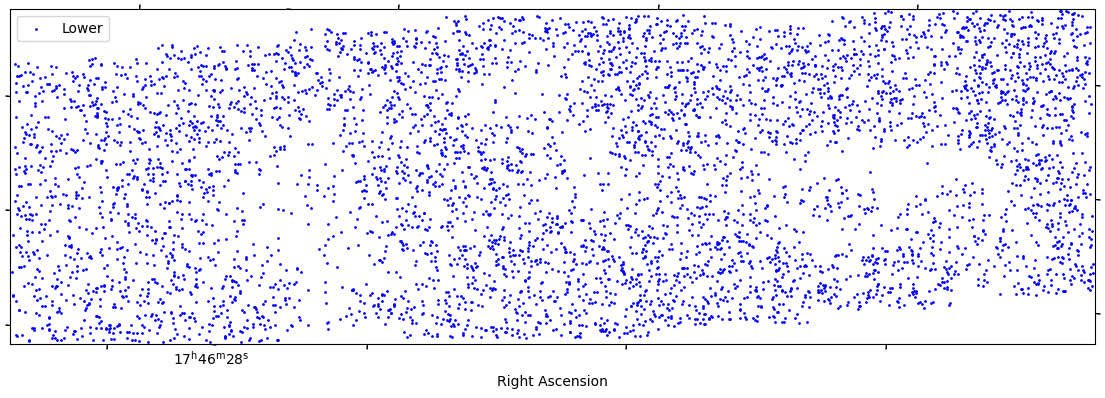

In [91]:
fig = plt.figure(figsize=(14, 10))
ax = plt.subplot(111, projection=wcs_405)
ax.imshow(blank_405, origin='lower')
#cat_clump_upper.plot_position(transform=ax.get_transform('world'), color='r', s=1, label='Upper')
cat_clump_lower.plot_position(transform=ax.get_transform('world'), color='b', s=1, label='Lower')
plt.legend(loc='upper left')